#Paquetes necesarios

In [9]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

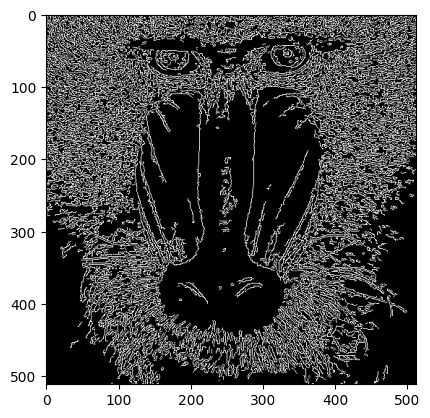

In [10]:
gris = cv2.cvtColor(cv2.imread('mandril.jpg') , cv2.COLOR_BGR2GRAY)

canny = cv2.Canny(gris, 100, 200)

plt.imshow(canny, cmap='gray') 
plt.show()

TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el máximo para filas y columnas (uno para cada) y muestra el número de filas con un número de píxeles blancos mayor o igual que 0.95*máximo.

El número de pixeles mayores se encuentra en la columna: 22440
El número de pixeles mayores se encuentra en la fila: 56100
178 Es una columna cerca al 95% del mayor
178 Es una columna cerca al 95% del mayor
187 Es una columna cerca al 95% del mayor
184 Es una columna cerca al 95% del mayor
185 Es una columna cerca al 95% del mayor
178 Es una columna cerca al 95% del mayor
178 Es una fila cerca al 95% del mayor
178 Es una fila cerca al 95% del mayor
187 Es una fila cerca al 95% del mayor
184 Es una fila cerca al 95% del mayor
185 Es una fila cerca al 95% del mayor
178 Es una fila cerca al 95% del mayor


(0.0, 512.0)

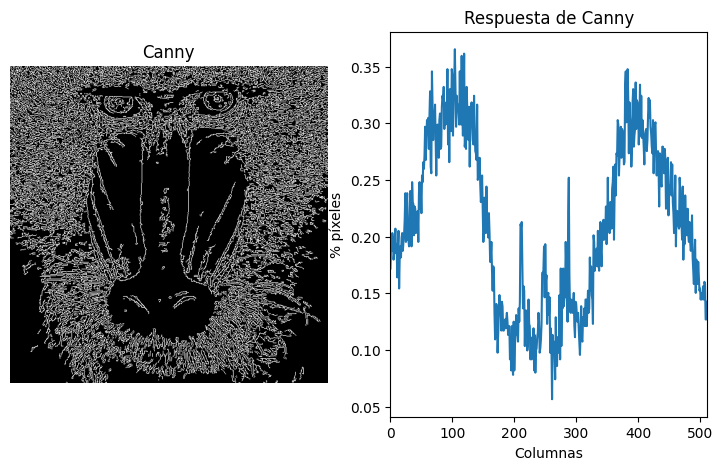

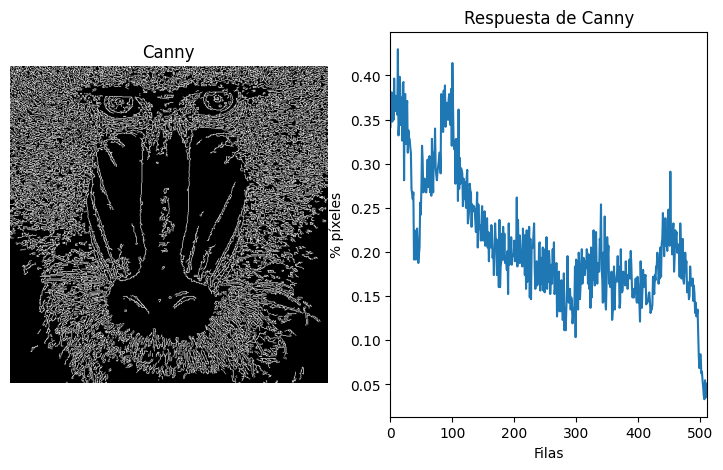

In [11]:
# Columnas

col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
cols = col_counts[0] / (255 * canny.shape[1])

col_counts_complete = []
for i in range (len(col_counts)):
    col_counts_complete.append(col_counts[0][i])

valor_maximo_col = np.max(col_counts_complete)

# Filas

row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
rows = row_counts[:, 0] / (255 * canny.shape[0])

row_counts_complete = []
for i in range (len(row_counts)):
    row_counts_complete.append(row_counts[i][0])

valor_maximo_row = np.max(row_counts_complete)

#-------------------------------------------------------------------------------------------------------------------------------

print("El número de pixeles mayores se encuentra en la columna:", valor_maximo_col)
print("El número de pixeles mayores se encuentra en la fila:", valor_maximo_row)

counts_max = np.sum(canny == 255, axis=0)
TopeCol = 0.95 * max(counts_max)

for i in counts_max:
    #print (i)
    if i >= TopeCol:
        print(i, "Es una columna cerca al 95% del mayor")

counts_max2 = np.sum(canny == 255, axis=0)
TopeCol2 = 0.95 * max(counts_max2)

for i in counts_max2:
    if i >= TopeCol:
        print(i, "Es una fila cerca al 95% del mayor")

#-------------------------------------------------------------------------------------------------------------------------------

# Columnas

plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
plt.xlim([0, canny.shape[0]])

# Filas

plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
plt.xlim([0, canny.shape[0]])

TAREA: Aplica umbralizado a la imagen resultante de Sobel (valores 0 a 255 y convertida a 8 bits por ejemplo sobel8 = np.uint8(sobel)), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny. Calcula los máximos por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

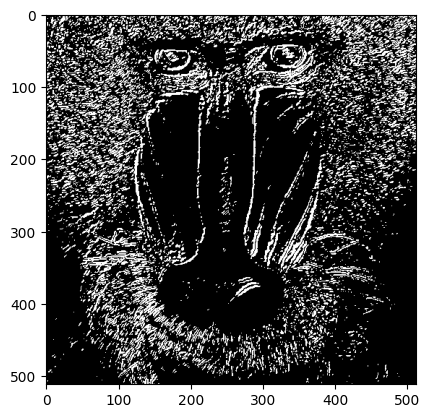

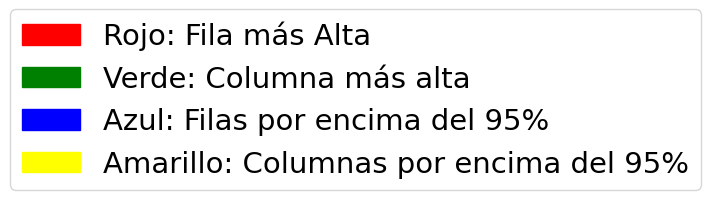

(0.0, 512.0)

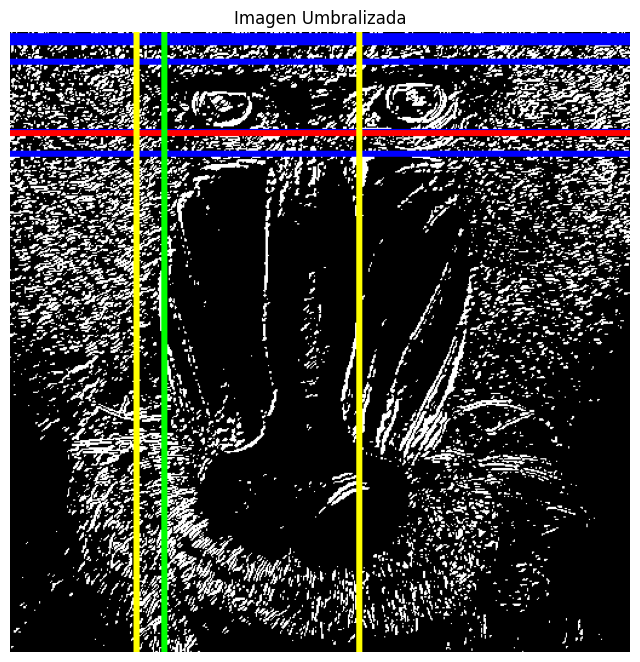

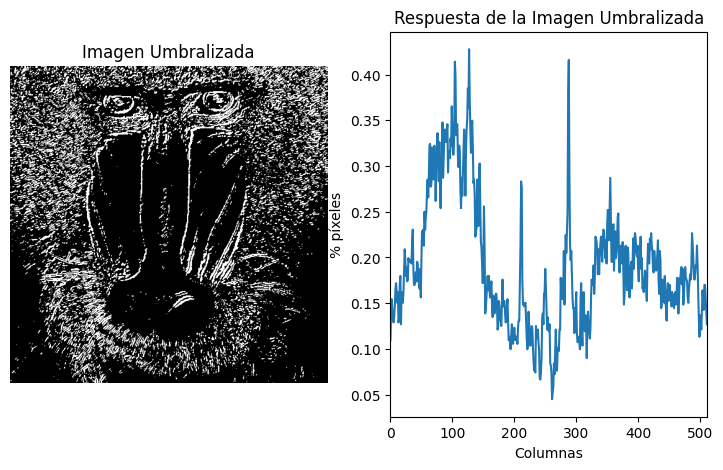

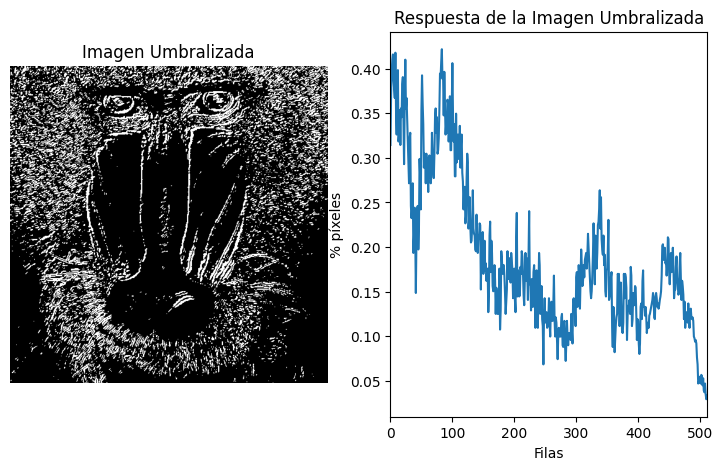

In [20]:
import matplotlib.patches as mpatches

# Se le Aplica Sobel

ggris = cv2.GaussianBlur(gris, (3, 3), 0)

sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y

sobel = cv2.add(sobelx, sobely)
sobel8 = cv2.convertScaleAbs(sobel)

# Se le aplica el Umbralizado

valorUmbral = 100
res, imagenUmbralizada = cv2.threshold(sobel8, valorUmbral, 255, cv2.THRESH_BINARY)

# Se muestra el resultado

plt.imshow(imagenUmbralizada, cmap='gray') #Visualiza con mapa de color gris
plt.show()

#-------------------------------------------------------------------------------------------------------------------------------

# Columnas

col_counts = cv2.reduce(imagenUmbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
cols = col_counts[0] / (255 * imagenUmbralizada.shape[1])

col_counts_complete = []
for i in range (len(col_counts[0])):
    col_counts_complete.append(col_counts[0][i])

valor_maximo_col = np.max(col_counts_complete)

# Filas

row_counts = cv2.reduce(imagenUmbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
rows = row_counts[:, 0] / (255 * imagenUmbralizada.shape[0])

row_counts_complete = []
for i in range (len(row_counts)):
    row_counts_complete.append(row_counts[i][0])

valor_maximo_row = np.max(row_counts_complete)

#-------------------------------------------------------------------------------------------------------------------------------

imagen_color = cv2.cvtColor(imagenUmbralizada, cv2.COLOR_GRAY2BGR)
CopiaColor = imagen_color.copy()

MaximoPorcentajeCol = 0.95 * valor_maximo_col
MaximoPorcentajeRow = 0.95 * valor_maximo_row

for i in range (0, imagenUmbralizada.shape[1] - 1):
    if (col_counts_complete[i] >= MaximoPorcentajeCol) and (col_counts_complete[i] != valor_maximo_col):
        cv2.line(CopiaColor, (i, 0), (i, 512), (255, 255, 0), 3)
    elif col_counts_complete[i] == valor_maximo_col:
        cv2.line(CopiaColor, (i, 0), (i, 512), (0, 255, 0), 3)

    if (row_counts_complete[i] >= MaximoPorcentajeRow) and (row_counts_complete[i] != valor_maximo_row):
        cv2.line(CopiaColor, (0, i), (512, i), (0, 0, 255), 3)
    elif row_counts_complete[i] == valor_maximo_row:
        cv2.line(CopiaColor, (0, i), (512, i), (255, 0, 0), 3)

cv2.addWeighted(CopiaColor, 0.5, imagen_color, 1 - 0.5, 0, imagen_color)

#-------------------------------------------------------------------------------------------------------------------------------

# Leyenda

plt.figure(figsize=(4, 2)) 
plt.axis("off")  

colors = ['red', 'green', 'blue', 'yellow']
labels = ['Rojo: Fila más Alta', 'Verde: Columna más alta', 'Azul: Filas por encima del 95%', 'Amarillo: Columnas por encima del 95%']

patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(colors))]

plt.legend(handles=patches, loc='center', fontsize=21)
plt.show()

# Imagen con los colores

plt.figure(figsize=(8, 10))
plt.imshow(CopiaColor, cmap='gray')

plt.axis("off")  
plt.title("Imagen Umbralizada")

#-------------------------------------------------------------------------------------------------------------------------------

# Columnas

plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Imagen Umbralizada")
plt.imshow(imagenUmbralizada, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de la Imagen Umbralizada")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
plt.xlim([0, imagenUmbralizada.shape[0]])

# Filas

plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Imagen Umbralizada")
plt.imshow(imagenUmbralizada, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de la Imagen Umbralizada")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
plt.xlim([0, imagenUmbralizada.shape[0]])


TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, incluya al menos dos usos diferentes de aplicar las funciones de OpenCV trabajadas hasta ahora.


In [21]:
vid = cv2.VideoCapture(0)

modo = 1

while True:
    ret, frame = vid.read()

    if ret:

        if modo == 1:

            output_frame = frame
            cv2.setWindowTitle("Default", 'Normal')

        elif modo == 2:

            framegris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            canny = cv2.Canny(framegris, 25, 200)
            output_frame = cv2.bitwise_not(canny)

            cv2.setWindowTitle("Default", 'Canny')

        elif modo == 3:

            framegris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            sobel = cv2.Sobel(framegris, cv2.CV_64F, 1, 0, ksize=3) 

            sobel8 = cv2.convertScaleAbs(sobel)
            output_frame = cv2.cvtColor(sobel8, cv2.COLOR_GRAY2BGR)

            cv2.setWindowTitle("Default", 'Sobel')

        cv2.imshow("Default", output_frame)

    key = cv2.waitKey(20) & 0xFF

    if key == 27: 
        break
    elif key == ord('1'):  
        modo = 1
    elif key == ord('2'): 
        modo = 2
    elif key == ord('3'):  
        modo = 3

vid.release()
cv2.destroyAllWindows()

TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) plantear una reinterpretación de la parte de procesamiento de la imagen tomando como punto de partida alguna de dichas instalaciones.

In [24]:
def AplicarSobel(frame, color):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # Máscara

    if color == "Rojo":
        LowerRojo1 = np.array([0, 120, 70])
        UpperRojo1 = np.array([10, 255, 255])
        LowerRojo2 = np.array([140, 120, 70])
        UpperRojo2 = np.array([160, 255, 255])

        Mascara1 = cv2.inRange(hsv, LowerRojo1, UpperRojo1)
        Mascara2 = cv2.inRange(hsv, LowerRojo2, UpperRojo2)
        Mascara = Mascara1 + Mascara2

    elif color == "Verde":
        LowerVerde = np.array([25, 50, 50]) 
        UpperVerde = np.array([95, 255, 255])  
        Mascara = cv2.inRange(hsv, LowerVerde, UpperVerde)

    elif color == "Azul":
        LowerAzul = np.array([75, 100, 20]) 
        UpperAzul = np.array([160, 255, 255])  
        Mascara = cv2.inRange(hsv, LowerAzul, UpperAzul)

    # Aplicación de Sobel
    
    FrameEsmacarado = cv2.bitwise_and(frame, frame, mask=Mascara)
    FrameEsmacaradoGris = cv2.cvtColor(FrameEsmacarado, cv2.COLOR_BGR2GRAY)
    
    sobelx = cv2.Sobel(FrameEsmacaradoGris, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(FrameEsmacaradoGris, cv2.CV_64F, 0, 1, ksize=3)

    sobelCombained = cv2.convertScaleAbs(cv2.add(sobelx, sobely))

    sobelFinal = cv2.cvtColor(sobelCombained, cv2.COLOR_GRAY2BGR)
    FrameFinal = cv2.bitwise_and(sobelFinal, sobelFinal, mask=Mascara)

    return FrameFinal


vid = cv2.VideoCapture(0)

modo = 1

while True:
    ret, frame = vid.read()
    
    if ret:

        if modo == 1:

            output_frame = AplicarSobel(frame, "Rojo")
            cv2.setWindowTitle("Default", 'Sobel en Rojo')

        elif modo == 2:

            output_frame = AplicarSobel(frame, "Verde")
            cv2.setWindowTitle("Default", 'Sobel en Verde')

        elif modo == 3:

            output_frame = AplicarSobel(frame, "Azul")
            cv2.setWindowTitle("Default", 'Sobel en Azul')

        cv2.imshow("Default", output_frame)

    cv2.imshow("Frame Original", frame) 
    key = cv2.waitKey(20) & 0xFF
    

    if key == 27: 
        break
    elif key == ord('1'):  
        modo = 1
    elif key == ord('2'): 
        modo = 2
    elif key == ord('3'):  
        modo = 3

vid.release()
cv2.destroyAllWindows()